# 로지스틱 회귀의 결정 경계 실습

In [1]:
import torch
import torch.nn.functional as F 
import numpy as np 
import matplotlib.pyplot as plt

### 임의의 데이터 생성

In [3]:
x = torch.randn(100, 2)
y =((x[:,0] > 0.5) & (x[:,1] >0.5)).float()

print(x, y)

tensor([[-7.8698e-01, -2.4729e+00],
        [-8.9099e-04, -1.8793e+00],
        [ 9.7477e-01, -1.2510e+00],
        [-8.4568e-01, -1.4798e+00],
        [-1.1733e+00,  7.9185e-02],
        [ 3.6505e-01,  1.8685e+00],
        [-1.8657e-02, -7.9063e-01],
        [-5.0836e-01, -3.0504e-01],
        [-1.1117e+00, -1.0145e+00],
        [-4.1552e-01,  1.0919e+00],
        [ 2.0930e+00, -1.4193e+00],
        [ 1.7864e+00, -9.5427e-02],
        [ 1.9323e+00,  6.6746e-01],
        [ 6.7085e-01,  1.6093e-01],
        [-1.1225e+00, -5.3607e-01],
        [ 8.7884e-01, -1.7214e+00],
        [ 4.4781e-01, -3.3718e-01],
        [ 9.2225e-01,  1.1241e+00],
        [ 3.2202e-01, -1.2022e+00],
        [-2.5007e+00, -1.0605e-01],
        [ 1.2411e+00,  9.5627e-01],
        [-1.8606e-01,  1.7199e+00],
        [-5.5835e-01, -2.2982e-01],
        [ 5.6223e-02,  1.6565e+00],
        [ 1.9094e-01, -6.6767e-01],
        [ 1.0742e+00, -1.1687e+00],
        [-2.5137e-02, -2.1365e+00],
        [ 8.7623e-03, -8.084

### 모델 정의

In [7]:
class LogisiticRegression(torch.nn.Module) : 
    def __init__(self, input_dim, output_dim) : 
        super(LogisiticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x) : 
        out = self.linear(x)
        fc = F.sigmoid(out)
#         print("fc >>>" ,fc)
        return fc
    
model = LogisiticRegression(input_dim=2, output_dim=1)

print(model)

LogisiticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


### 모델 학습 , 결정 경계 그리기

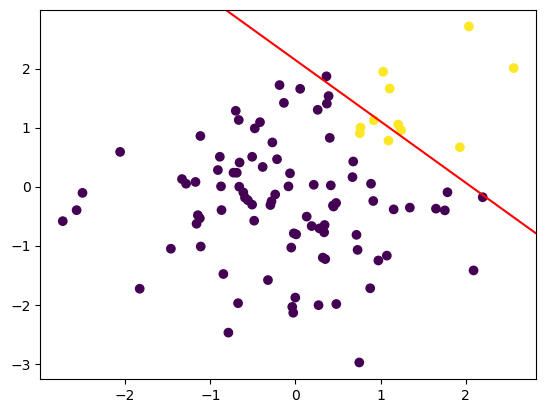

In [8]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(1000) : 
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# 결정 경계 그리기 
plt.scatter(x[:,0], x[:,1], c=y)
x_min, x_max = plt.xlim() # x 좌표 최소값 최대값 
y_min, y_max = plt.ylim() # Y 좌표 최소값 최대값 

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
"""
np.meshgrid() -> x, y 좌표를 기반으로 격자 포인트 생성

xx, yy -> 2차원 배열 가집니다.
"""

z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float32)).detach().numpy()
"""
 xx yy -> np.c_[] : xx yy 연결-> torch.tensor 변경하고 ravel() -> 2차원 배열 1차원 평면화 -> 변환된 입력 -> 모델 전달 
 -> .detach().numpy() 예측값을 넘파이 형태로변환 -> z 저장

"""
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[0.5], colors='r')
"""
plt.contour() -> xx, yy 격자에 대응하는 결정경계 그리는 함수 
"""
plt.show()
